# Topic Modelling: _Federal Writers' Project_

This JupyterNotebook was devised by DARIAH and can be retrieved from https://github.com/DARIAH-DE/Topics.

In [1]:
from pathlib import Path
import dariah
import cophi
from cophi_toolbox import preprocessing
import os
import metadata_toolbox.utils as metadata
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

## Preprocessing the corpus

Setting the path:

In [2]:
directory = Path("data", "fwp-chunks")

Displaying the files in the folder:

In [3]:
sorted(os.listdir(path=directory))

['alabama_1_0000.txt',
 'alabama_1_0001.txt',
 'alabama_1_0002.txt',
 'alabama_1_0003.txt',
 'alabama_1_0004.txt',
 'alabama_1_0005.txt',
 'alabama_1_0006.txt',
 'alabama_1_0007.txt',
 'alabama_1_0008.txt',
 'alabama_1_0009.txt',
 'alabama_1_0010.txt',
 'alabama_1_0011.txt',
 'alabama_1_0012.txt',
 'arkansas_1_0000.txt',
 'arkansas_1_0001.txt',
 'arkansas_1_0002.txt',
 'arkansas_1_0003.txt',
 'arkansas_1_0004.txt',
 'arkansas_1_0005.txt',
 'arkansas_1_0006.txt',
 'arkansas_1_0007.txt',
 'arkansas_1_0008.txt',
 'arkansas_2_0000.txt',
 'arkansas_2_0001.txt',
 'arkansas_2_0002.txt',
 'arkansas_2_0003.txt',
 'arkansas_2_0004.txt',
 'arkansas_2_0005.txt',
 'arkansas_2_0006.txt',
 'arkansas_2_0007.txt',
 'arkansas_2_0008.txt',
 'arkansas_2_0009.txt',
 'arkansas_3_0000.txt',
 'arkansas_3_0001.txt',
 'arkansas_3_0002.txt',
 'arkansas_3_0003.txt',
 'arkansas_3_0004.txt',
 'arkansas_3_0005.txt',
 'arkansas_3_0006.txt',
 'arkansas_3_0007.txt',
 'arkansas_3_0008.txt',
 'arkansas_3_0009.txt',
 'ark

In [4]:
pattern = '{state}_{volume}_{chunk}'

Generates a table featuring the files' state, volume, and chunk number:

In [5]:
meta = pd.concat([metadata.fname2metadata(str(path), pattern=pattern) for path in directory.glob('*.txt')])
meta[:10]

,state,volume,chunk
data\fwp-chunks\alabama_1_0000.txt,alabama,1,0000
data\fwp-chunks\alabama_1_0001.txt,alabama,1,0001
data\fwp-chunks\alabama_1_0002.txt,alabama,1,0002
data\fwp-chunks\alabama_1_0003.txt,alabama,1,0003
data\fwp-chunks\alabama_1_0004.txt,alabama,1,0004
data\fwp-chunks\alabama_1_0005.txt,alabama,1,0005
data\fwp-chunks\alabama_1_0006.txt,alabama,1,0006
data\fwp-chunks\alabama_1_0007.txt,alabama,1,0007
data\fwp-chunks\alabama_1_0008.txt,alabama,1,0008
data\fwp-chunks\alabama_1_0009.txt,alabama,1,0009


Read the documents and display the text of a sample file:

In [6]:
corpus = list(preprocessing.read_files(meta.index))
corpus[2]

"I about funeral and weddin us nigger nebber maie and do nt remember any big weddin of the white folk but they bury folk then the same as they do now in a box they would bury the slave same as they do the white folk but we do nt eben have no babtizin on count of dat overseer he do not like for we to get no religion cose all slave do not have hard treatment like we do because dere overseer and master warnt as mean as ourn nom we do not know nothin about no hoodoo stuff in they day they only have homemade medicine dat be unless they got sho nuff powerful sick and then they would go to see a doctor we use boneset tea make from a weed lawd it be bitterer dan quinine and it be good for the chill and fever and it would purge you too then we use lifeeverlastin tea for fever and jerusalem brushreed to get rid of worm but miss I know dere be goste because when I be a little boy my mammy come in from the field and lay across the bed and I be sittin in front of the fireplace and a big sompn like 

### Tokenising using cophi
(see https://github.com/cophi-wue/cophi-toolbox/blob/master/notebooks/introducing-cophi.ipynb):

In [7]:
corpus, metadata = cophi.corpus(directory,
                      lowercase=True,
                      token_pattern=r"\p{Letter}+\p{Connector_Punctuation}?\p{Letter}+",
                      metadata=True)

In [8]:
corpus.stats

documents        259.0
types          37065.0
tokens       2377208.0
hapax          24440.0
dtype: float64

### Removal of most frequent words, hapax legomena, and person names
List of most frequent words:

In [9]:
mfw = corpus.mfw(100)
mfw

['the',
 'and',
 'be',
 'to',
 'they',
 'he',
 'in',
 'of',
 'have',
 'we',
 'do',
 'not',
 'my',
 'she',
 'on',
 'it',
 'go',
 'get',
 'for',
 'but',
 'when',
 'you',
 'all',
 'with',
 'old',
 'dat',
 'master',
 'that',
 'come',
 'his',
 'say',
 'one',
 'about',
 'would',
 'time',
 'up',
 'at',
 'slave',
 'no',
 'then',
 'out',
 'know',
 'as',
 'see',
 'from',
 'white',
 'so',
 'tell',
 'good',
 'make',
 'man',
 'her',
 'year',
 'house',
 'work',
 'day',
 'take',
 'some',
 'em',
 'what',
 'child',
 'folk',
 'like',
 'never',
 'there',
 'big',
 'by',
 'or',
 'could',
 'live',
 'nigger',
 'just',
 'after',
 'this',
 'back',
 'now',
 'name',
 'mother',
 'down',
 'place',
 'give',
 'war',
 'if',
 'en',
 'little',
 'dere',
 'long',
 'use',
 'too',
 'here',
 'two',
 'our',
 'well',
 'plantation',
 'miss',
 'right',
 'off',
 'want',
 'can',
 'remember']

Hapax legomena (words occuring only once in the corpus):

In [10]:
corpus.hapax[:10]

['aac',
 'aad',
 'aadat',
 'aamy',
 'aaronford',
 'aauctionin',
 'aaxe',
 'aaxin',
 'aba',
 'abab']

Default stopword list:

In [11]:
path_to_stopwordlist = "data/stopwords/en.txt"
extern_stopwords = [line.strip() for line in open(path_to_stopwordlist, 'r')]
extern_stopwords[:10]

['a',
 'able',
 'about',
 'above',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act']

List of person names generated through NLTK's Named Entitity Recognition:

In [12]:
path_to_ner = "data/stopwords/fwp-ner.txt"
ner = [line.strip() for line in open(path_to_ner, 'r')]
ner[:10]

['clifton estate',
 'isaac garrett',
 'missy kilpatrick',
 'marse joe echols',
 'artie',
 'marse william chaney',
 'patsey allan',
 'john blackshier',
 'saddy',
 'jim hicks']

Definition of most frequent words, hapax legomena, the default stopword list, and the person names:

In [13]:
features = mfw + corpus.hapax + extern_stopwords + ner

print(f"{len(features)} types will be removed from the corpus.")

47648 types will be removed from the corpus.


Displaying meta data:

In [14]:
metadata.iloc[:10]

,uuid,filepath,parent,title,suffix
0,81744bcc-4333-11ee-87a0-00090ffe0001,data\fwp-chunks\alabama_1_0000.txt,data\fwp-chunks,alabama_1_0000,.txt
1,8176d2ed-4333-11ee-834e-00090ffe0001,data\fwp-chunks\alabama_1_0001.txt,data\fwp-chunks,alabama_1_0001,.txt
2,8176d2ee-4333-11ee-aa88-00090ffe0001,data\fwp-chunks\alabama_1_0002.txt,data\fwp-chunks,alabama_1_0002,.txt
3,81796414-4333-11ee-86c4-00090ffe0001,data\fwp-chunks\alabama_1_0003.txt,data\fwp-chunks,alabama_1_0003,.txt
4,817bf856-4333-11ee-9706-00090ffe0001,data\fwp-chunks\alabama_1_0004.txt,data\fwp-chunks,alabama_1_0004,.txt
5,817bf857-4333-11ee-93fe-00090ffe0001,data\fwp-chunks\alabama_1_0005.txt,data\fwp-chunks,alabama_1_0005,.txt
6,817e7425-4333-11ee-ba76-00090ffe0001,data\fwp-chunks\alabama_1_0006.txt,data\fwp-chunks,alabama_1_0006,.txt
7,817e7426-4333-11ee-bf75-00090ffe0001,data\fwp-chunks\alabama_1_0007.txt,data\fwp-chunks,alabama_1_0007,.txt
8,8180f7d2-4333-11ee-8946-00090ffe0001,data\fwp-chunks\alabama_1_0008.txt,data\fwp-chunks,alabama_1_0008,.txt
9,818340a6-4333-11ee-9ddc-00090ffe0001,data\fwp-chunks\alabama_1_0009.txt,data\fwp-chunks,alabama_1_0009,.txt


The corpus is represented as a document-term matrix with absolute word frequencies from which the features you selected above are dropped:

In [15]:
dtm = corpus.drop(corpus.dtm, features).fillna(0).astype(int)
dtm.iloc[:5, :5]

,abandon,abbot,abcs,abeen,abel
81744bcc-4333-11ee-87a0-00090ffe0001,0,0,0,0,0
8176d2ed-4333-11ee-834e-00090ffe0001,0,0,0,0,0
8176d2ee-4333-11ee-aa88-00090ffe0001,0,0,0,0,0
81796414-4333-11ee-86c4-00090ffe0001,0,0,0,0,0
817bf856-4333-11ee-9706-00090ffe0001,0,0,0,0,0


In [16]:
dtm = corpus.map_metadata(data=dtm,
                          metadata=metadata,
                          uuid="uuid",
                          fields=["title"]).fillna(0).astype(int)
dtm.iloc[:5,:10]

,abandon,abbot,abcs,abeen,abel,ability,abner,aboard,abolish,abolitionist
alabama_1_0000,0,0,0,0,0,0,0,0,0,0
alabama_1_0001,0,0,0,0,0,1,0,0,0,0
alabama_1_0002,0,0,0,0,0,0,0,0,0,0
alabama_1_0003,0,0,0,0,0,1,0,0,0,0
alabama_1_0004,0,0,0,0,0,0,0,0,0,0


## Training the model

In [17]:
# Show all rows of the topic model
pd.set_option('display.max_rows', None)

In [18]:
model = dariah.core.LDA(num_topics=80,
                        num_iterations=5000,
                        mallet="C:/mallet/bin/mallet.bat")
model

<Model: LDA, 80 topics, 5000 iterations, alpha=0.1, eta=0.01>

In [19]:
model.fit(dtm)

Topic-word distribution:

In [20]:
model.topics.iloc[:, :10]

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9
topic0,thing,read,side,crop,high,servant,ghost,shuckin,saturday,range
topic1,maam,read,chair,quilt,preach,chicago,parent,knit,daylight,pin
topic2,brownsville,ranch,mcneel,greenville,ship,steamboat,pole,sleepy,pumpkin,trap
topic3,crowder,yesm,orford,diden,whuppin,kaze,niggah,plenny,worker,whitefolk
topic4,case,lack,haid,side,danuel,nuff,outen,beesley,jude,granmammy
topic5,yankees,officer,lide,stick,going,ellum,nevuh,portsmouth,point,moble
topic6,whip,call,owner,side,ago,pass,head,kind,buy,fireplace
topic7,yankees,member,han,warnt,deyd,teach,call,surrender,skeere,brung
topic8,american,unit,guide,reference,worker,recall,potato,feather,city,personal
topic9,noem,yesem,louieville,cromwell,lebanon,king,yeah,hire,member,doan


Topic-document distribution

In [21]:
model.topic_document.iloc[:5, :5]

1,alabama_1_0000,alabama_1_0001,alabama_1_0002,alabama_1_0003,alabama_1_0004
topic0,0.000001,0.000001,2.230410e-02,0.064109,0.000001
topic1,0.000001,0.000001,9.292989e-07,0.000001,0.000001
topic2,0.002482,0.000001,9.292989e-07,0.000001,0.000001
topic3,0.000001,0.000001,9.292989e-07,0.000001,0.000001
topic4,0.023159,0.000001,2.118811e-01,0.014155,0.000001


## Visualising the model

In [22]:
vis = dariah.core.Vis(model)
vis

<Visualization: LDA, 80 topics, 5000 iterations, alpha=0.1, eta=0.01>

In [23]:
# Information about possible visualisations:
#help(vis)

Heatmap displaying the prevalence of topics within the individual documents:

<AxesSubplot:ylabel='1'>

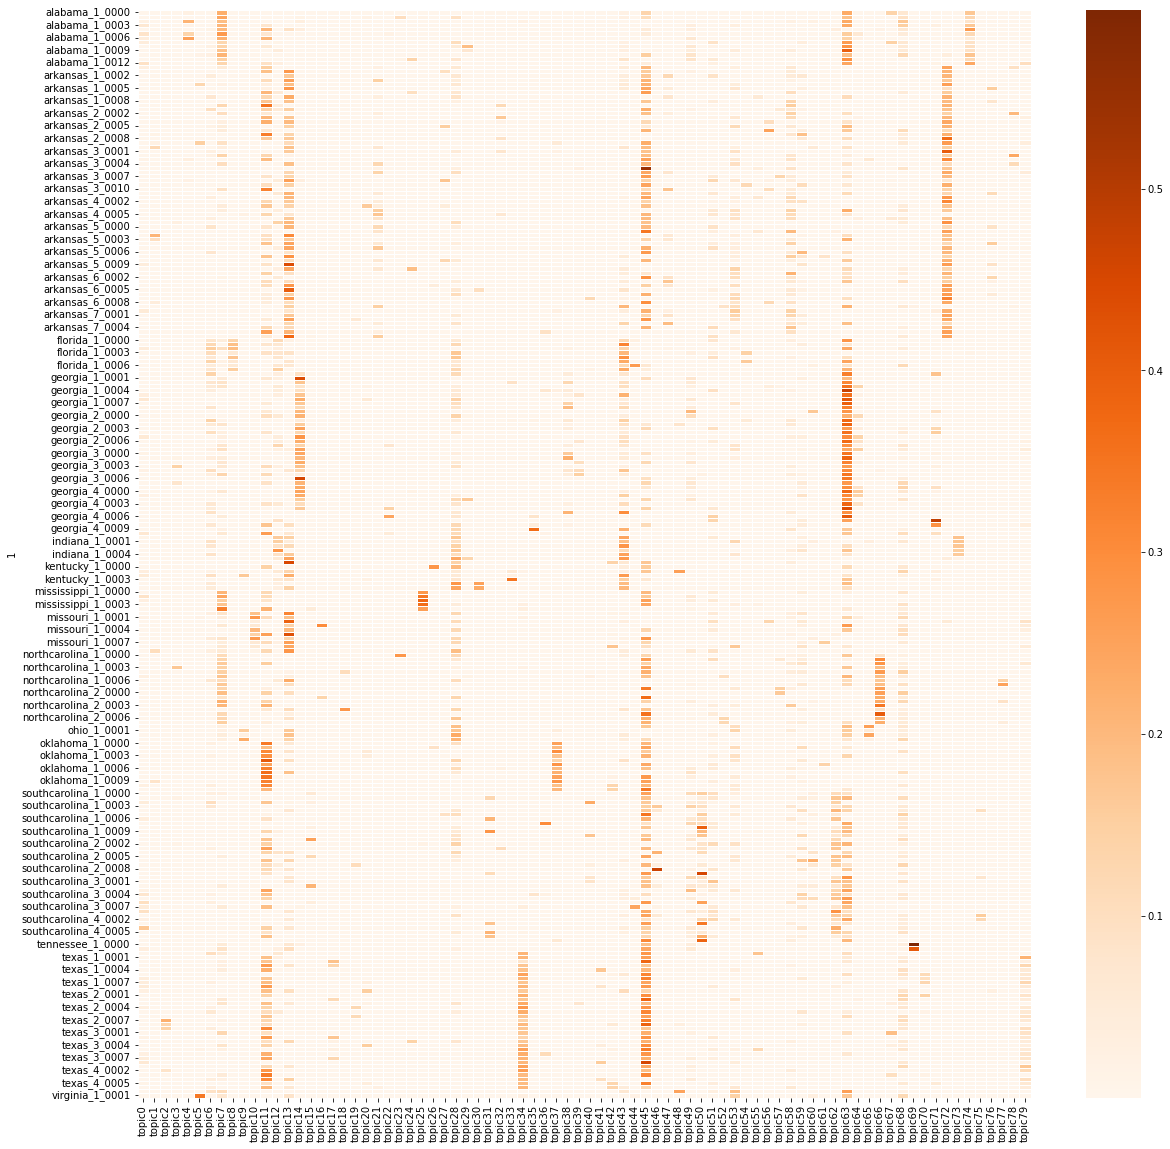

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20] 
vis.topic_document(cmap='Oranges')

Comparison of topics:

<AxesSubplot:>

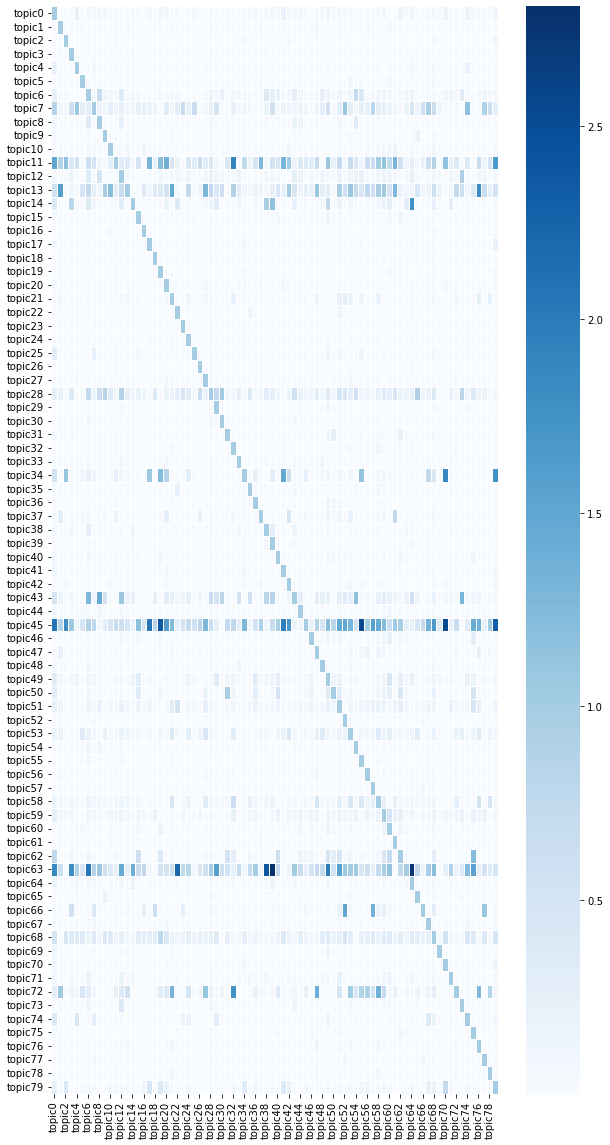

In [25]:
vis.topic_similarities(cbar=True)

Comparison of the frequency of specific words in the distinct topics:

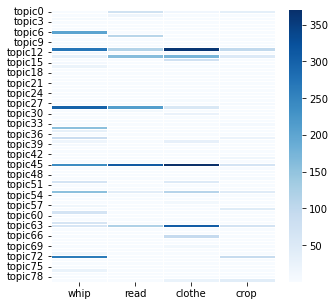

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5] 

vis.topic_word(words=["whip", "read", "clothe", "crop"])

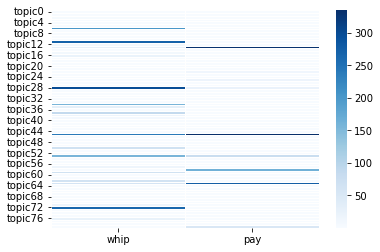

In [31]:
%matplotlib inline

vis.topic_word(words=["whip", "pay"], cbar=True)

Distribution of words within a topic:

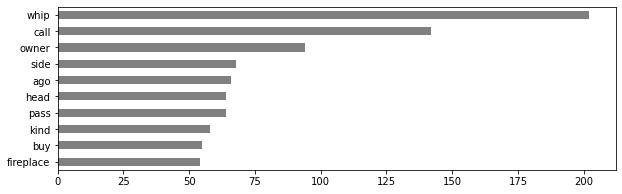

In [42]:
vis.topic("topic6")
plt.rcParams['figure.figsize'] = [10, 5]

Distribution of topics within a given document:

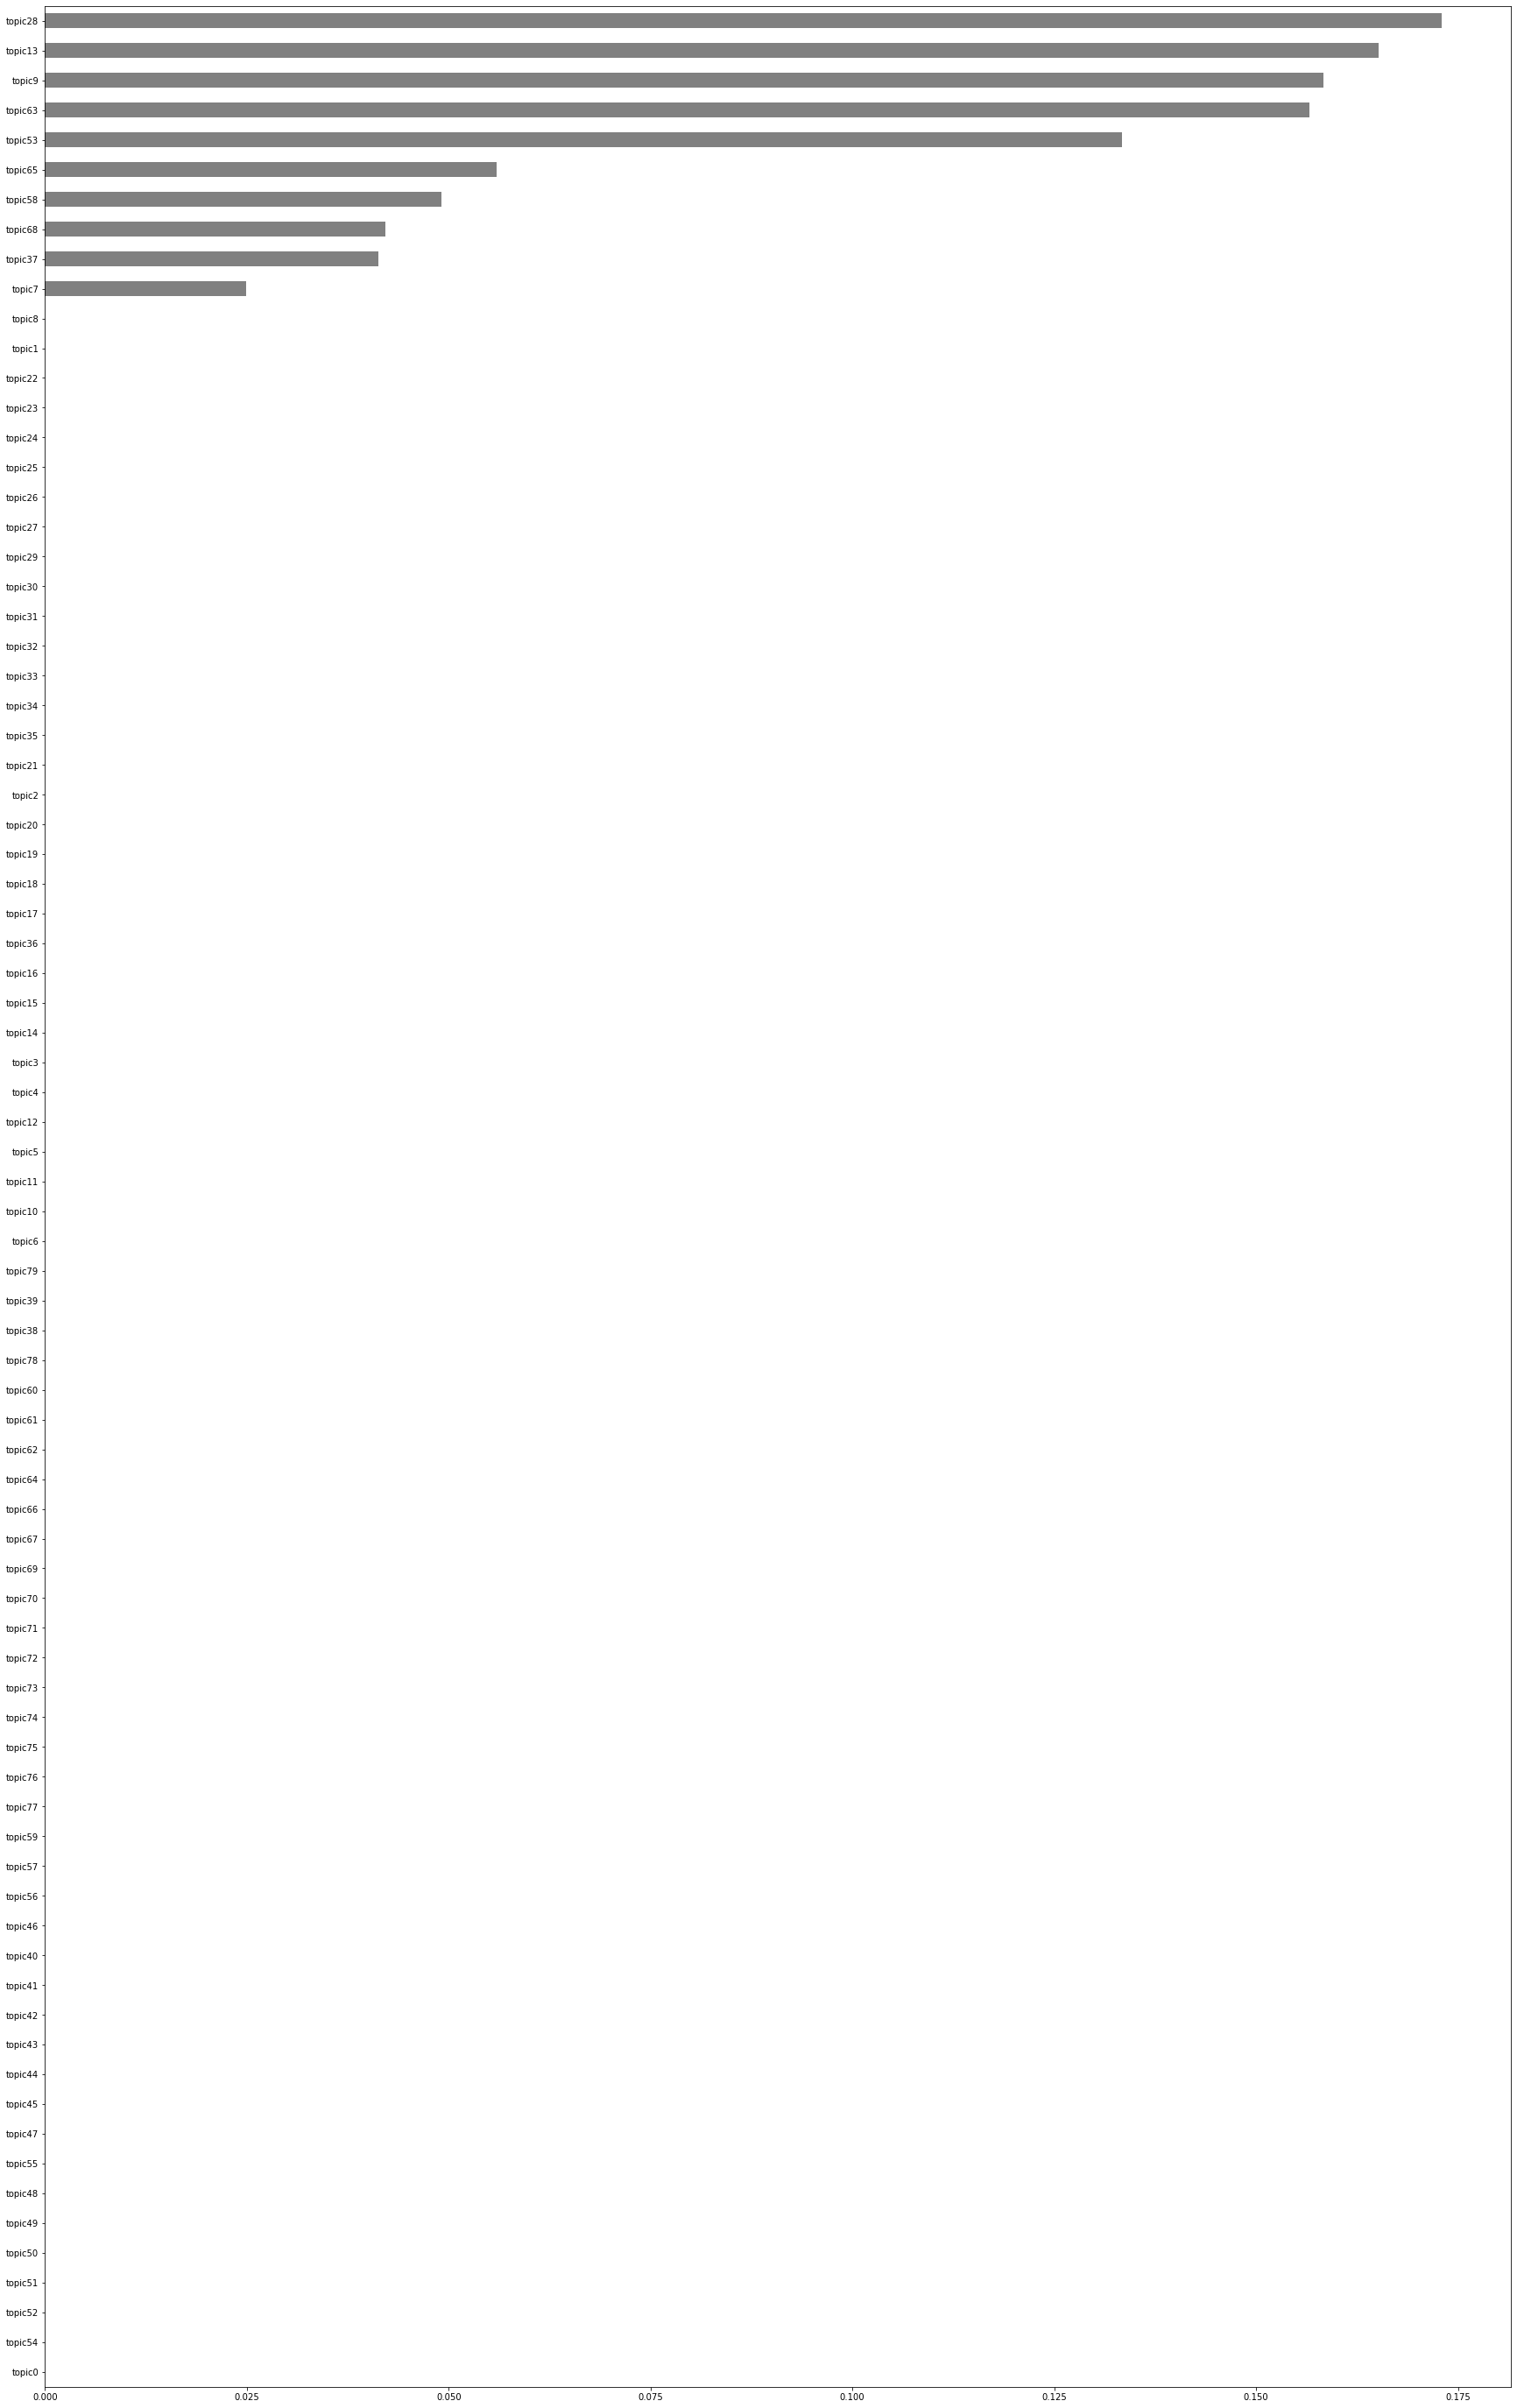

In [44]:
vis.document("ohio_1_0001")
plt.rcParams['figure.figsize'] = [50, 50]